In [1]:
import pandas as pd


In [2]:
# OBAFGKM
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

In [3]:
result = []
for spectral in spectral_types:
    path = "./{0}/XP_CONTINUOUS_COMBINED.csv".format(spectral)
    df1 = pd.read_csv(path)
    result.append(df1)

df_list_sorted = sorted(result, key=lambda x: len(x))


In [4]:
result2 = []
total = 12000
size_remaining = len(df_list_sorted)
for df in df_list_sorted:
    limit = min(len(df), int(total / size_remaining))
    df = df.sample(limit)
    result2.append(df)
    total -= limit
    size_remaining -= 1

df_combined = pd.concat(result2)
df_combined

,source_id,solution_id,bp_basis_function_id,bp_degrees_of_freedom,bp_n_parameters,bp_n_measurements,bp_n_rejected_measurements,bp_standard_deviation,bp_chi_squared,bp_coefficients,...,rp_n_parameters,rp_n_measurements,rp_n_rejected_measurements,rp_standard_deviation,rp_chi_squared,rp_coefficients,rp_coefficient_errors,rp_coefficient_correlations,rp_n_relevant_bases,rp_relative_shrinking
40,4687429557724211840,4545469030156206081,56,1499,55,1554,21,1.083740,1760.5658,"(543.9180873055386, 42.737251481110505, -43.15...",...,55,2197,4,1.023999,2246.0469,"(1586.884524541349, 188.04952166521159, 63.109...","(1.5380642, 1.6116923, 1.6168747, 1.5270122, 1...","(0.02131748, -0.09356086, -0.09995343, -0.0212...",16,0.999977
24,1362592672604119168,4545469030156206080,56,1340,55,1395,62,1.094105,1604.0693,"(82967.0679987788, 11964.379659427803, -1643.9...",...,55,2187,62,1.170751,2922.2400,"(206115.3764604976, 15060.520040031595, 10038....","(102.55398, 111.91085, 117.228966, 96.80768, 1...","(0.2510581, -0.21017593, -0.39228016, 0.052380...",12,0.999995
36,4687500338789868800,4545469030156206081,56,1621,55,1676,10,1.047289,1777.9375,"(5450.721129778515, 720.7935307396709, -210.61...",...,55,2276,35,1.107006,2721.7524,"(11281.892299624353, 332.0629451738749, 390.57...","(3.2256744, 2.877748, 2.942419, 3.2976146, 3.1...","(0.080726855, 0.20048599, -0.04077899, -0.0160...",17,0.999999
32,6042124880664530176,4545469030156206081,56,2237,55,2292,29,1.079692,2607.7476,"(45904.39056460602, -6432.896058993876, -391.8...",...,55,4030,38,1.085001,4679.4736,"(47826.772835948264, -6373.994547542908, -414....","(7.079164, 7.3245277, 7.1581035, 7.072724, 7.2...","(0.012575718, -0.057512213, 0.021888882, -0.02...",13,1.000000
5,6656956286668909568,4545469030156206081,56,1411,55,1466,27,1.082488,1653.3823,"(162281.7285251911, 16738.73765193377, -8632.3...",...,55,2027,38,1.161493,2660.3577,"(289811.5522765275, -3621.5664054678487, 2941....","(50.478508, 50.691372, 48.681973, 47.60374, 51...","(0.0895185, -0.024425281, -0.037456688, 0.0363...",29,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,425441528863585024,4545469030156206080,56,2534,55,2589,26,1.143974,3316.1890,"(156896.23235819733, -39116.28170545613, 5784....",...,55,3473,67,1.773808,10754.3810,"(135249.97443340148, -20940.50270348845, -3612...","(32.65775, 33.30234, 31.712276, 33.35591, 31.8...","(-0.10657837, 2.1125737E-4, 0.19754423, -0.043...",35,1.000000
4253,5333579555995118080,4545469030156206081,56,1739,55,1794,12,1.084041,2043.5760,"(69732.57884964938, -26639.353031496394, 6356....",...,55,2535,22,1.283306,4084.2470,"(44214.39309509398, -10507.748702024679, -1598...","(9.367945, 9.901298, 9.098316, 9.487853, 8.531...","(-0.2829025, -0.042508923, 0.3798609, -0.06262...",11,0.999999
3402,5891695712739336448,4545469030156206080,56,2351,55,2406,50,1.100022,2844.8250,"(152527.92175056346, -48174.31570600105, 9607....",...,55,3356,71,1.207130,4810.0970,"(114340.43049358613, -21937.024806729118, -348...","(20.139738, 21.796848, 20.425348, 20.433178, 1...","(-0.14930381, -0.10623333, 0.23598981, -0.0550...",42,1.000000
336,5338230730747046144,4545469030156206080,56,1777,55,1832,30,1.071257,2039.2686,"(239609.65605631605, -78183.19967648863, 16901...",...,55,2456,42,1.440883,4984.8237,"(173981.99352718174, -35976.451977944256, -489...","(43.148426, 45.887585, 42.626045, 43.811478, 3...","(-0.26391807, -0.05286295, 0.37698314, -0.0743...",35,1.000000


In [5]:
df_combined.to_csv('main_sequence.csv', header=True, index=False)

In [6]:
# Import the tool
from gaiaxpy import calibrate

# El espectro calibrado que es un objeto de tipo pandas DataFrame (calibrated_spectra)
calibrated_spectra, sampling = calibrate(df_combined, save_file=False)
calibrated_spectra

,source_id,flux,flux_error
0,4687429557724211840,"[1.1467683251232783e-17, 7.294453622550376e-18...","[5.346309839992566e-18, 4.0940353492235125e-18..."
1,1362592672604119168,"[1.2386113783339456e-17, 2.486642598073306e-16...","[1.0032920768385132e-16, 7.582713023520475e-17..."
2,4687500338789868800,"[2.134624571036162e-17, 2.2168606532505037e-17...","[8.542533779421006e-18, 6.312056270049755e-18,..."
3,6042124880664530176,"[6.776557490912209e-16, 6.320639572522182e-16,...","[4.203241543237932e-17, 3.051480671961e-17, 2...."
4,6656956286668909568,"[8.91357069447797e-16, 1.0437093208127323e-15,...","[2.266136518630539e-16, 1.7354522151919546e-16..."
...,...,...,...
11995,425441528863585024,"[3.909891879156011e-15, 3.880732893142983e-15,...","[1.5763968440512543e-16, 1.226734307136543e-16..."
11996,5333579555995118080,"[3.219057826499756e-15, 3.29470714021237e-15, ...","[1.9703618742436618e-16, 1.6414412645913116e-1..."
11997,5891695712739336448,"[4.8804447619117184e-15, 4.866796226121446e-15...","[1.856219516061133e-16, 1.4742116278816497e-16..."
11998,5338230730747046144,"[1.0629288311373553e-14, 1.0058543441538589e-1...","[5.892262900632762e-16, 4.817680308525106e-16,..."


In [7]:
sampling

array([ 336.,  338.,  340.,  342.,  344.,  346.,  348.,  350.,  352.,
        354.,  356.,  358.,  360.,  362.,  364.,  366.,  368.,  370.,
        372.,  374.,  376.,  378.,  380.,  382.,  384.,  386.,  388.,
        390.,  392.,  394.,  396.,  398.,  400.,  402.,  404.,  406.,
        408.,  410.,  412.,  414.,  416.,  418.,  420.,  422.,  424.,
        426.,  428.,  430.,  432.,  434.,  436.,  438.,  440.,  442.,
        444.,  446.,  448.,  450.,  452.,  454.,  456.,  458.,  460.,
        462.,  464.,  466.,  468.,  470.,  472.,  474.,  476.,  478.,
        480.,  482.,  484.,  486.,  488.,  490.,  492.,  494.,  496.,
        498.,  500.,  502.,  504.,  506.,  508.,  510.,  512.,  514.,
        516.,  518.,  520.,  522.,  524.,  526.,  528.,  530.,  532.,
        534.,  536.,  538.,  540.,  542.,  544.,  546.,  548.,  550.,
        552.,  554.,  556.,  558.,  560.,  562.,  564.,  566.,  568.,
        570.,  572.,  574.,  576.,  578.,  580.,  582.,  584.,  586.,
        588.,  590.,

In [19]:
calibrated_spectra['flux'][0]

array([3.08531212e-15, 3.14505733e-15, 2.70541689e-15, 2.40193470e-15,
       2.47189742e-15, 2.39598377e-15, 2.03939383e-15, 2.05440414e-15,
       2.80683739e-15, 3.25070581e-15, 2.44781515e-15, 1.72623434e-15,
       2.11405340e-15, 2.83078420e-15, 2.87783687e-15, 2.44030591e-15,
       2.46602792e-15, 3.08264397e-15, 3.27149860e-15, 2.46458337e-15,
       1.51622462e-15, 1.54623355e-15, 2.18820088e-15, 2.08681216e-15,
       1.09366499e-15, 5.38572821e-16, 1.15570415e-15, 2.10643406e-15,
       2.33969063e-15, 1.86744155e-15, 1.57269411e-15, 2.16979796e-15,
       3.51691195e-15, 4.82867126e-15, 5.35889571e-15, 5.05577263e-15,
       4.48065497e-15, 4.27211930e-15, 4.63096661e-15, 5.24406382e-15,
       5.56728439e-15, 5.33602578e-15, 4.73812085e-15, 4.24343288e-15,
       4.24048814e-15, 4.77027822e-15, 5.50997768e-15, 6.06831397e-15,
       6.22468931e-15, 6.06093964e-15, 5.89203729e-15, 6.02514030e-15,
       6.54594086e-15, 7.32606025e-15, 8.09237218e-15, 8.60174123e-15,
      

Default sampling


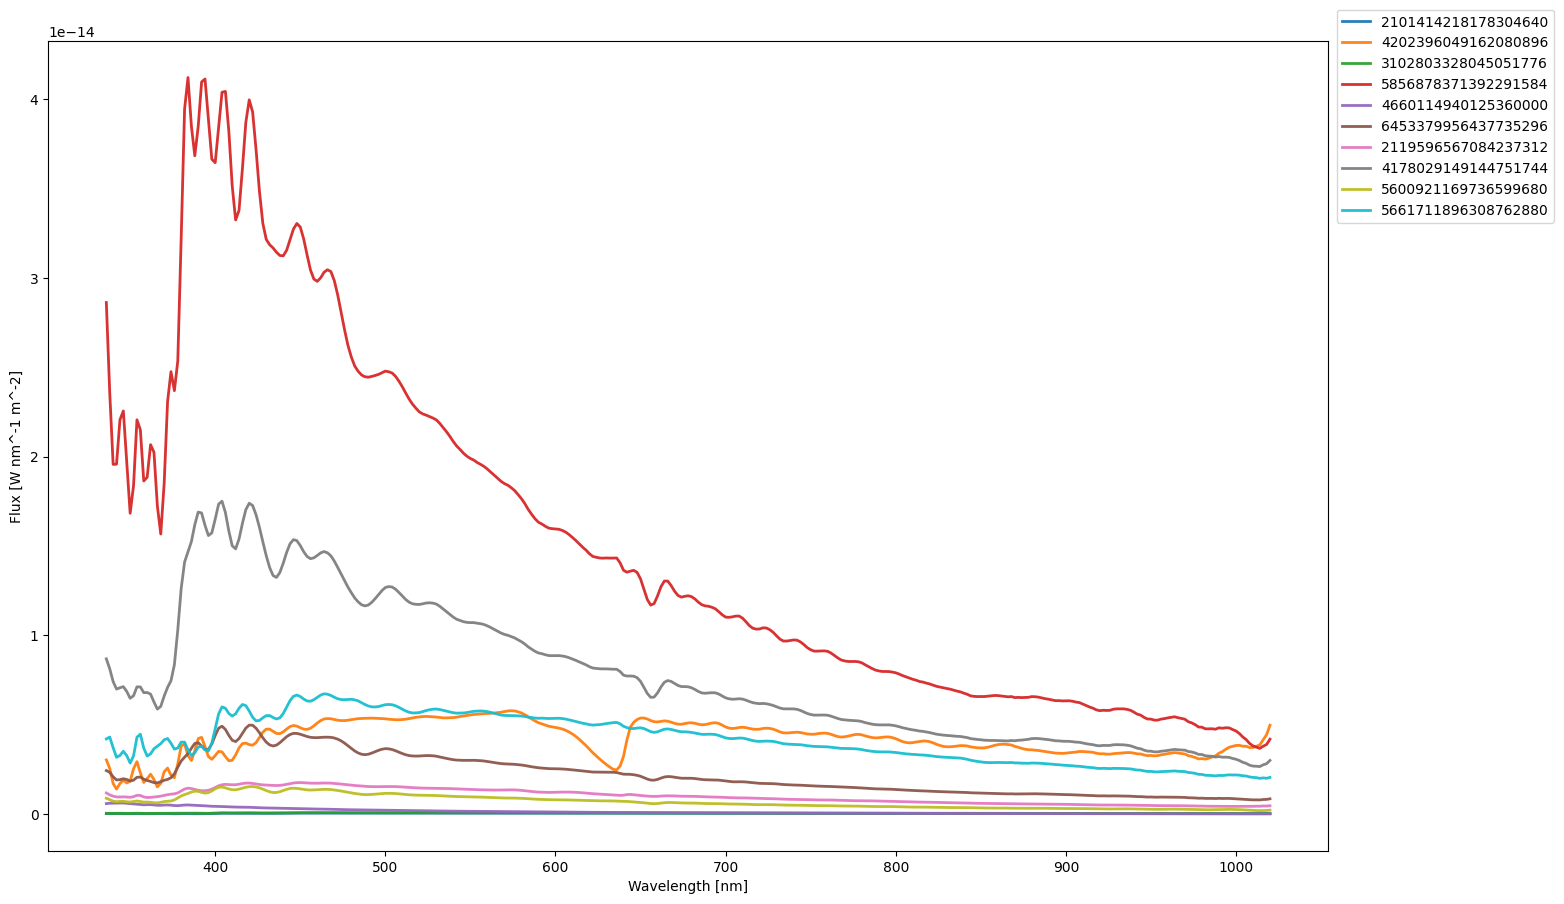

In [8]:
from gaiaxpy import plot_spectra

print('Default sampling')
# Do not show the legend as there's only one source in the data
first = plot_spectra(calibrated_spectra.sample(10), multi=True, sampling=sampling)

In [9]:
source_id = calibrated_spectra['source_id']
# source_id.to_csv('source_id.csv', header=True, index=False)

In [10]:
dfluxes = pd.DataFrame(calibrated_spectra['flux'].tolist(), columns=range(343))
# dfluxes.to_csv('stars.csv', header=True, index=False)

### Normalization

In [11]:
import numpy as np

array_flux = []

for n in range(len(calibrated_spectra['flux'])):  #Recorre toda la columna "flux"
    lista_flux = calibrated_spectra['flux'][n].tolist()  #Toma los valores del flux y lo agrega en una lista

    array_flux = np.array(lista_flux)
    min_val = abs(np.amin(array_flux))

    for j in range(len(array_flux)):
        array_flux[j] += min_val

    max_val = np.amax(array_flux)

    for i in range(len(array_flux)):
        array_flux[i] /= max_val

    calibrated_spectra['flux'][n] = array_flux


In [12]:
dfluxes_norm = pd.DataFrame(calibrated_spectra['flux'].tolist(), columns=range(343))
# dfluxes_norm.to_csv('stars_normalized.csv', header=True, index=False)

Default sampling


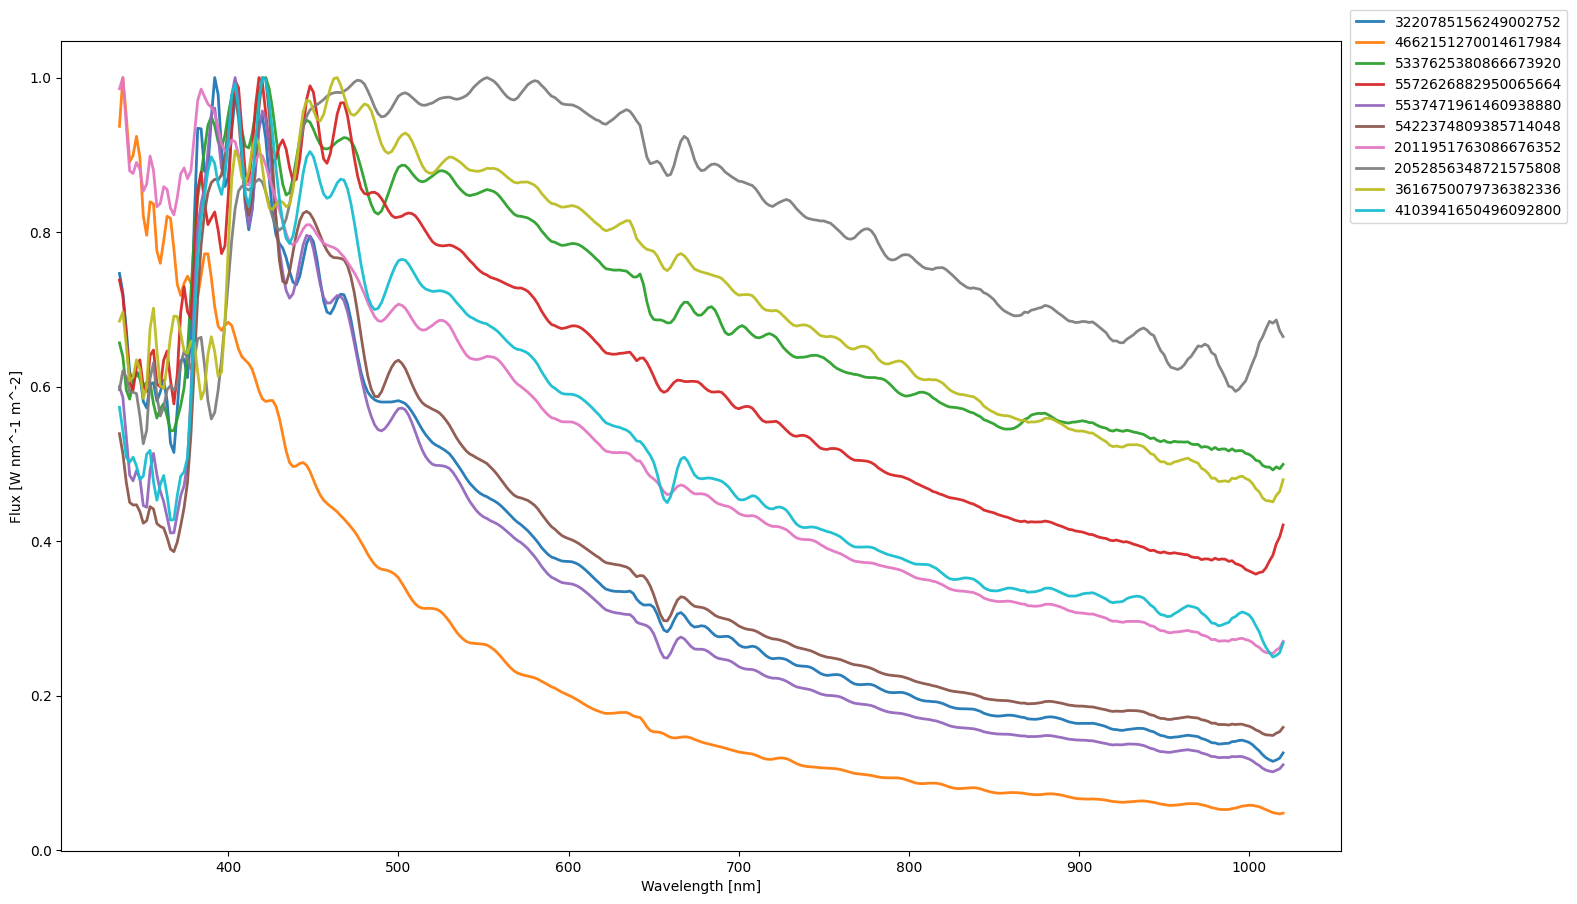

In [13]:
from gaiaxpy import plot_spectra

print('Default sampling')
# Do not show the legend as there's only one source in the data
first = plot_spectra(calibrated_spectra.sample(10), multi=True, sampling=sampling)
# print('Geometric progression (log) sampling')
# second=plot_spectra(first_spectra_geom, sampling=geom_sampling)

In [14]:
dfluxes_norm_labeled = dfluxes_norm.assign(id=4)
dfluxes_norm_labeled.head()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.331682,0.233679,0.215546,0.216154,0.194007,0.165446,0.167142,0.199505,0.231084,0.233052,...,0.801136,0.815180,0.816159,0.828180,0.848156,0.860755,0.904779,0.933986,1.000000,4
1,0.006366,0.067089,0.130786,0.117592,0.070724,0.062528,0.088088,0.090008,0.075235,0.103753,...,0.883489,0.876501,0.856017,0.851008,0.858330,0.861728,0.902775,0.931003,1.000000,4
2,0.130049,0.133931,0.159556,0.145198,0.119136,0.118490,0.129117,0.120468,0.116584,0.151694,...,0.836722,0.851489,0.853038,0.865584,0.882848,0.884904,0.909905,0.906183,0.924620,4
3,0.681902,0.656269,0.634686,0.623153,0.616503,0.607074,0.603142,0.607213,0.622417,0.641883,...,0.615506,0.613100,0.605474,0.602735,0.603495,0.601809,0.612101,0.616735,0.634068,4
4,0.169917,0.198326,0.159046,0.089996,0.063416,0.086203,0.115511,0.124132,0.125404,0.122819,...,0.819138,0.828434,0.825248,0.834481,0.850439,0.853893,0.883148,0.886807,0.915729,4


In [15]:
# dfluxes_norm_labeled.to_csv('stars_normalized_labeled.csv', header=True, index=False)

Adicionar a los espectros normalizados ya existentes

In [16]:
stars_NGS = pd.read_csv('../espectros_normalizados_SNG.csv', names=dfluxes_norm_labeled.columns)
stars_NGS

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.298540,0.288910,0.270728,0.265745,0.281003,0.287176,0.266657,0.239145,0.244118,0.270922,...,0.893952,0.907187,0.906909,0.920086,0.939917,0.944382,0.975344,0.975237,1.000000,1
1,0.187321,0.059904,0.040154,0.150801,0.259516,0.217557,0.058846,0.153158,0.151218,0.288894,...,0.513965,0.522141,0.529018,0.552321,0.589843,0.627874,0.693038,0.742824,0.814167,1
2,0.354986,0.452690,0.350241,0.240637,0.276160,0.357691,0.339475,0.259200,0.261950,0.319587,...,0.757199,0.692856,0.618022,0.563389,0.534353,0.529347,0.580790,0.659196,0.799375,1
3,0.258981,0.205888,0.125221,0.119809,0.177436,0.203863,0.167638,0.136339,0.164524,0.195191,...,0.389137,0.420764,0.450557,0.487642,0.524829,0.544773,0.566638,0.553427,0.534909,1
4,0.058639,0.059465,0.030795,0.017400,0.030421,0.038995,0.027836,0.020623,0.035006,0.044762,...,0.878500,0.897841,0.905135,0.926023,0.952516,0.960777,0.991910,0.986293,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12732,0.110724,0.117143,0.108315,0.094340,0.095868,0.113917,0.128631,0.120617,0.103777,0.103601,...,0.904124,0.903131,0.884643,0.877637,0.877998,0.868636,0.891624,0.897031,0.938228,3
12733,0.123169,0.056995,0.075046,0.085722,0.073361,0.089574,0.134921,0.136902,0.083655,0.069436,...,0.914451,0.924044,0.919261,0.927998,0.943784,0.945054,0.974174,0.973854,1.000000,3
12734,0.149852,0.098694,0.087556,0.092886,0.097180,0.102063,0.106407,0.091439,0.060448,0.054961,...,0.949209,0.963151,0.959169,0.965922,0.976643,0.969675,0.989756,0.980251,1.000000,3
12735,0.232100,0.166834,0.098958,0.090816,0.123015,0.141063,0.122684,0.100418,0.125119,0.179554,...,0.909980,0.926298,0.928572,0.943763,0.964274,0.966858,0.993788,0.985947,1.000000,3


In [17]:
stars_NGSM = pd.concat((stars_NGS, dfluxes_norm_labeled))
stars_NGSM

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.298540,0.288910,0.270728,0.265745,0.281003,0.287176,0.266657,0.239145,0.244118,0.270922,...,0.893952,0.907187,0.906909,0.920086,0.939917,0.944382,0.975344,0.975237,1.000000,1
1,0.187321,0.059904,0.040154,0.150801,0.259516,0.217557,0.058846,0.153158,0.151218,0.288894,...,0.513965,0.522141,0.529018,0.552321,0.589843,0.627874,0.693038,0.742824,0.814167,1
2,0.354986,0.452690,0.350241,0.240637,0.276160,0.357691,0.339475,0.259200,0.261950,0.319587,...,0.757199,0.692856,0.618022,0.563389,0.534353,0.529347,0.580790,0.659196,0.799375,1
3,0.258981,0.205888,0.125221,0.119809,0.177436,0.203863,0.167638,0.136339,0.164524,0.195191,...,0.389137,0.420764,0.450557,0.487642,0.524829,0.544773,0.566638,0.553427,0.534909,1
4,0.058639,0.059465,0.030795,0.017400,0.030421,0.038995,0.027836,0.020623,0.035006,0.044762,...,0.878500,0.897841,0.905135,0.926023,0.952516,0.960777,0.991910,0.986293,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.730632,0.726560,0.681125,0.636204,0.633349,0.645004,0.636686,0.616625,0.634351,0.678258,...,0.386398,0.382537,0.375584,0.372064,0.371168,0.369304,0.375324,0.378316,0.389356,4
11996,0.921894,0.941528,0.916875,0.886034,0.882913,0.881384,0.859216,0.823223,0.828010,0.864297,...,0.189109,0.185676,0.180409,0.176801,0.174717,0.172815,0.175596,0.178217,0.186059,4
11997,0.777822,0.776031,0.729968,0.676932,0.666365,0.688426,0.702798,0.677298,0.648219,0.655921,...,0.285782,0.283568,0.278985,0.276788,0.276338,0.274937,0.279184,0.281023,0.288770,4
11998,0.988293,0.941436,0.830018,0.762640,0.787453,0.834082,0.819669,0.742454,0.717021,0.796954,...,0.247655,0.244116,0.238419,0.234916,0.233227,0.231288,0.234843,0.237216,0.245440,4


In [18]:
stars_NGSM.to_csv('../espectros_normalizados_SNGM.csv', header=True, index=False)